In [2]:
from package import thin_demo
from package import extractContours
from package import generateBezierCurve
import cv2 as cv
import numpy as np
import random
import os
import shutil


# delete and create a folder for outputs.
try:
    shutil.rmtree(os.path.join(os.getcwd(), "new_images"))
except FileNotFoundError as error: print("new_images/ folder doesn't exist")
os.mkdir(os.path.join(os.getcwd(), "new_images"))

selected = set()
for i in range(5):
   selected.add('{0:03}'.format(random.randint(1,55)))

path = 'archive/Img/'
for filename in os.listdir(path):
    name, extension = filename.split(".")
    category, index = name.split("-")
    if index not in selected: continue
    extension = "." + extension
    ##############
    name = 'img009-047'
    ##############
    print(name)
    img = cv.imread(path + name + extension)
    contours = thin_demo(img)
    print(contours)
    nodes = extractContours(contours)
    print(nodes)
    generateBezierCurve(name, nodes, numSegments=8, filename=name, degree=3, toPlot=True)
    break

img009-047
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


TypeError: 'bool' object is not subscriptable

{'051', '008', '025', '047', '045'}
img001-004-000
(900, 1200, 3)
(900, 1200)


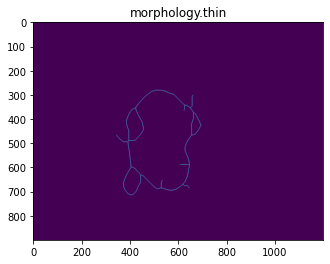

In [4]:
from package import thin_demo
from package import extractContours
from package import generateBezierCurve
import matplotlib.pyplot as plt
import cv2 as cv
import random
import os
import shutil


# delete and create a folder for outputs.
try:
    shutil.rmtree(os.path.join(os.getcwd(), "new_images"))
except FileNotFoundError as error: print("new_images/ folder doesn't exist")
os.mkdir(os.path.join(os.getcwd(), "new_images"))

selected = set()
for i in range(5):
   selected.add('{0:03}'.format(random.randint(1,55)))
print(selected)

path = 'archive/Img/'
for filename in os.listdir(path):
    name, extension = filename.split(".")
    category, index = name.split("-")
    if index not in selected: continue
    extension = "." + extension
    ##############
    name = 'img001-004-000'
    ##############
    print(name)
    # img = cv.imread(path + name + extension)
    img = cv.imread('../SSDA/output_image_thick/img001-002-001.png')
    print(img.shape)
    contours = thin_demo(img)
    print(contours.shape)
    f, ax = plt.subplots(1,1)
    ax.imshow(contours)
    ax.set_title('morphology.thin')
    plt.show()
    break

In [7]:
a = [1, 26, 1]
index_maxAreaOfRegions = max(range(len(a)), key=a.__getitem__)
index_maxAreaOfRegions

1

In [2]:
from package import bwlabel
input = [[True, True, False, False, False, False] ,[True, True, False, True, False, False] ,[True, True, False, True, False, False], [True, True, False, True, False, False] ,[True, True, False, False, True, True] ,[True, True, False, False, True, True]]
res = bwlabel(input)
print(res)

[[2, 2, False, False, False, False], [2, 2, False, 3, False, False], [2, 2, False, 3, False, False], [2, 2, False, 3, False, False], [2, 2, False, False, 4, 4], [2, 2, False, False, 4, 4]]


img006-042


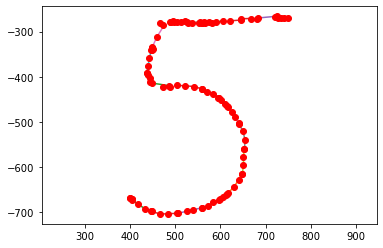

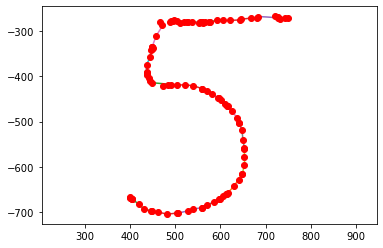

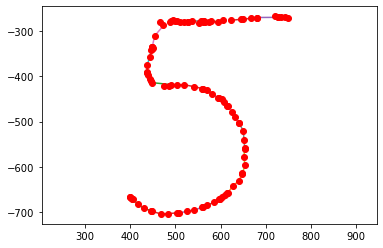

In [27]:
from package import thin_demo, extractContours, generateBezierCurve, isTconnection, bwlabel, countAreaOfRegion, extractControlPoints, convertBinaryToPoints, randomDeform, smoothing_base_bezier
import numpy as np
import math
import cv2 as cv
import bezier
import random
import os
import shutil
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

path = 'archive/Img/'
pathname = 'new_images/'
for filename in os.listdir(path):
    name, extension = filename.split(".")
    category, index = name.split("-")
    extension = "." + extension
    ##############
    name = 'img006-042'
    ##############
    print(name)
    img = cv.imread(path + name + extension)
    # cv.resize(img, [300,400])
    row = img.shape[0]
    skel = thin_demo(img)
        
    ############ parameters to be changed ############
    degreeOfShifting = math.floor(row/256) * 1 # to be modified
    patchResolution = int(row / 256 * 16) # to be modified
    numOfDeform = 3 # to be modified
    ############ parameters to be changed ############

    for i in range(1, row-1):
        for j in range(1, row-1):
            if skel[i, j]:
                isTconnected = isTconnection(skel[i-1:i+2, j-1:j+2])
                if (isTconnected):
                    skel[i, j] = False
    
    mapsOfPotins = {} # to store points
    for i in range(1, numOfDeform+1): mapsOfPotins[i] = [[],[]]

    for i in range(0, int(row/patchResolution)):
        for j in range(0, int(row / patchResolution)):
            # for each patch
            patch = skel[i * patchResolution : (i+1) * patchResolution, j * patchResolution : (j+1) * patchResolution]
            if patch.any() == True:
                # print('patch.any() == True')
                pointsInPatch = convertBinaryToPoints(patch)
                # print("*******************************************")
                # print(pointsInPatch.shape)
                # 4 control points from the original segment
                if pointsInPatch.shape[1] > 4:
                    controlPoints_of_segment = extractControlPoints(pointsInPatch, degree=3) 
                curve = bezier.Curve(controlPoints_of_segment, degree=3)
                # 4 Beziered points from the original segment
                list_deformedPoints = randomDeform(curve.nodes, numOfDeform, degreeOfShifting)
                # [[[x0,x1,x2,x3],[y0,y1,y2,y3]],   [[x0,x1,x2,x3],[y0,y1,y2,y3]],   [[x0,x1,x2,x3][y0,y1,y2,y3]],   [[x0,x1,x2,x3][y0,y1,y2,y3]], ....]
                ind = 1
                for point in list_deformedPoints:
                    x = point[0] + i * patchResolution
                    y = point[1] + j * patchResolution
                    axs = plt.gca()
                    axs.axis("equal")
                    plt.figure(ind)
                    # x_curve, y_curve = smoothing_base_bezier(x, y, k=0.3, closed=False)
                    # plt.plot(y_curve, -x_curve, label='$k=0.3$')
                    plt.plot(y, -x, 'ro')
                    plt.savefig(pathname + name + '-{0:03}'.format(ind) + '.png')
                    ind += 1

    break

X Co-ordinate... [-1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6  -0.56
 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12 -0.08
 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4
  0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88
  0.92  0.96  1.  ]
Y Co-ordinate... [ 0.22617085  0.14948405  1.25262509 -1.2456554   0.71258672 -0.1733249
 -1.97066524 -0.29682853  0.67015303  1.37911122  2.19388466  0.50817692
 -0.13957232  1.07226471  0.05931544  0.88904951  0.09630634  1.17915949
  0.68749871 -0.63767982 -0.41291379 -1.24456159 -0.34203903  0.86758778
  1.87027243  1.26298111  0.46657563  2.59209757  0.59764309  1.00516278
 -1.12211218 -0.29438165 -0.61721923  0.25334421  1.20107677  1.209886
  0.62316278  0.3034465  -1.29953538 -0.05091617  0.7417447  -1.36774645
 -0.32077741 -1.29931622  0.85178461 -2.71375356 -1.74034953 -0.24466366
 -1.0617777   0.08333926 -0.57419471]


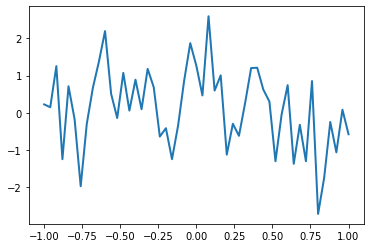

ValueError: x and y must have same first dimension, but have shapes (51,) and (4,)

In [6]:
import numpy as np
from numpy.polynomial import polynomial as P
import matplotlib.pyplot as plt


# The x-coordinate
x = np.linspace(-1,1,51)

# Display the x-coordinate
print("X Co-ordinate...",x)

# The y-coordinate
y = x**3 - x + np.random.randn(len(x))
print("Y Co-ordinate...",y)

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

plt.show()

# To get the least-squares fit of a polynomial to data, use the polynomial.polyfit() in Python Numpy

# The method returns the Polynomial coefficients ordered from low to high. If y was 2-D, the coefficients in column k of coef represent the polynomial fit to the data in y’s k-th column.
c, stats = P.polyfit(x,y,3,full=True)
ax.plot(x, c, linewidth=2.0)

plt.show()

print("Result...",c)
print("Result...",stats)


In [2]:
nodes = [[], []]
x = [0, 1 ]
y = 

import numpy as np
a = [[False, True, True, True, True, True], [True, False, True, True, True, True], [True, True, False, True, True, True], 
[True, True, True, False, True, True], [True, True, True, True, False, True], [True, True, True, True, True, False]]
a = np.array(a)
sum(a[0][:])
a[0:3, 0:3]
print(a.any())

a = (1, 2, 3)
a[0] = 3

True


TypeError: 'tuple' object does not support item assignment

In [40]:
arr = np.array([1, 2, 3, 4])

int

In [1]:
import numpy as np
from package import bwlabel
b = [[False, True, False, False, False, False], [False, True, False, True, False, False], [False, True, False, True, False, False], 
[False, True, False, False, True, False], [False, True, False, False, True, False], [False, True, False, True, True, True]]
b = np.array(b)
c = bwlabel(b)
print(c)

(array([[ 0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  5,  0,  0],
       [ 0,  1,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1],
       [ 0, 10,  0,  1,  1, 13]]), 13)


In [13]:
from package import randomDeform
import numpy as np
node = [[1, 2, 3, 4], [5, 6, 7, 8]]
node = np.array(node)
# print(node[:, 1:3])
list_deformedPoints = randomDeform(node, 3, 25)
# print(list_deformedPoints)

mapsOfPotins = {}
# mapsOfPotins[1] = [[x,x,x,x,][y y y y y]]
for i in range(1, 4): mapsOfPotins[i] = [[],[]]
ind = 1
for point in list_deformedPoints:
    x = point[0]
    y = point[1]
    mapsOfPotins[ind][0].append(x)
    mapsOfPotins[ind][1].append(y)
    ind += 1
